In [1]:
import sympy as sp
import numpy as np
from scipy.optimize import root_scalar, fsolve

from parameters import *
from functions import *
from matplotlib import pyplot as plt


In [21]:
alpha = np.load("data/alpha_lo.npy")
F0 = F_0_2_lo(mu_list, alpha)

alpha = np.load("data/alpha_nlo.npy")
F1 = np.load("data/F1.npy")
F2 = np.load("data/F2.npy")
F3 = np.load("data/F3.npy")


0.0031662869888230555


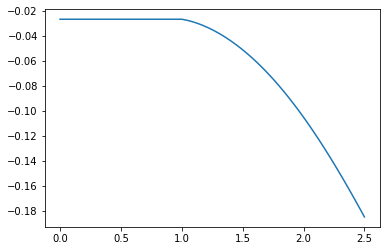

In [22]:
# plt.plot(mu_list, F0)
plt.plot(mu_list, F2)
print(1 /2 * 1 / (4 * np.pi)**2)

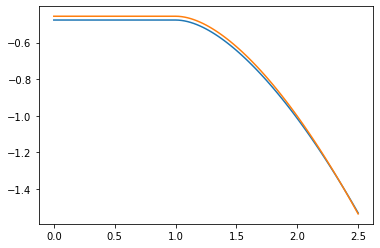

In [23]:
F = F1 + F2 + F3
plt.plot(mu_list, F0)
plt.plot(mu_list, F)

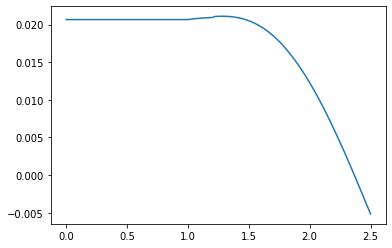

In [24]:
plt.plot(mu_list, F - F0)

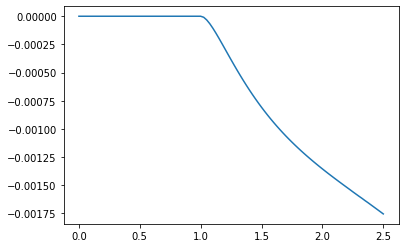

In [31]:
F3 = np.load("data/F3.npy")

plt.plot(mu_list, F3)

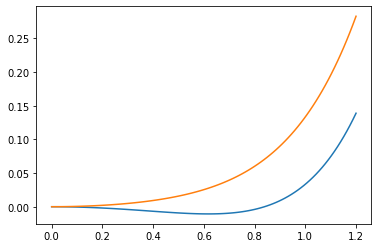

In [8]:

g = lambda x: sp.factorial(x)
h = lambda x, t: t * x**2 / g(2) + x**4 / g(4) + x**6 / g(4)

x = np.linspace(0, 1.2, 100)
plt.plot(x, h(x, -0.1))
plt.plot(x, h(x, +0.1))
plt.show()

In [3]:
F_0_4_diff_mu_symb

-(-2*m**4*mu*sin(a)**2*cos(a)**2/(m**2*cos(a) + mu**2*sin(a)**2) - 4*m**2*mu**3*sin(a)**4*cos(a)/(m**2*cos(a) + mu**2*sin(a)**2) + 2*m**2*mu*(2*l4 - 2*log(m**2*cos(a) + mu**2*sin(a)**2) + 1)*sin(a)**2*cos(a) - 2*mu**5*sin(a)**6/(m**2*cos(a) + mu**2*sin(a)**2) + 4*mu**3*(l1/3 + 2*l2/3 - log(m**2*cos(a) + mu**2*sin(a)**2) + 1/2)*sin(a)**4)/(32*pi**2)

In [4]:
sol = sp.solve(m**2 *(1 - m**2 * l3 / fpi * 1/(2*(4 * pi)**2))- 1, m)
sol

[-8.61573883571800, -1.00680456267166, 1.00680456267166, 8.61573883571800]

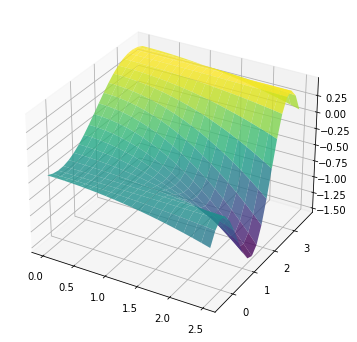

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6, 6))

N = 20
d = 0.5
a = np.linspace(-d, np.pi + d, N)
mu = np.linspace(0, 2.5, N)
MU, A = np.meshgrid(mu, a)
# FLO, FNLO = get_free_energy_surface()

X, Y, Z = MU, A, F_0_2_lo(MU, A)

surf = ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8, zorder=2, lw=0.4)
plt.show()

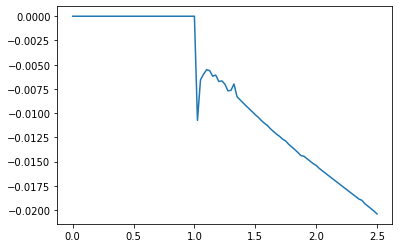

In [9]:
import matplotlib.pyplot as plt
a1 = get_alpha_nlo()
a0 = get_alpha_lo()
plt.plot(mu_list, (a1-a0))

In [7]:
A = np.linspace(0, 8, 9).reshape((3, 3))
A[A<5]

array([0., 1., 2., 3., 4.])

In [8]:
alpha_0 = lambda mu: 0 if mu**2<1 else np.arccos(1/mu**2)

m = 2.5
x0 = alpha_0(m) - 0.01

F_0_2_lo(m, x0), F(m, x0)

(-1.5297983602726815, -1.5323603295748616)

4.165925925925926

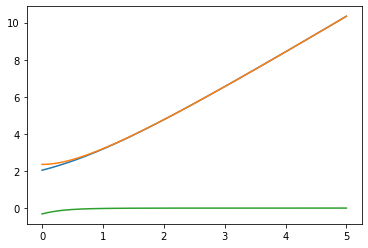

In [11]:
import matplotlib.pyplot as plt

m = 1.8
x0 = alpha_0(m)

Ep2 = lambdify((p, mu, a), Ep_sq)
Em2 = lambdify((p, mu, a), Em_sq)

f1 = lambdify((p, mu, a), sp.sqrt(Em_sq) + sp.sqrt(Ep_sq))

f2 = lambdify((p, mu, a), sp.sqrt(E1_sq) + sp.sqrt(E2_sq))

x = np.linspace(0, 5, 1000)
y = dF_fin(x, m, x0)
plt.plot(x, f1(x, m, x0))
plt.plot(x, f2(x, m, x0))
plt.plot(x, f1(x, m, x0) - f2(x, m, x0))

core = lambdify((p, mu, a), (4 * p**2 * m12**2 + M_sq**2 - 4*m1_sq*m2_sq))

core(0, m, x0)
Ep2(0, m, x0)

In [10]:
a0_list = get_alpha_lo()
a1_list = get_alpha_nlo()

a1_list

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.30094736, 0.42806637, 0.5190027 , 0.59251107,
       0.65417679, 0.70720905, 0.75469443, 0.79641763, 0.83476638,
       0.8693009 , 0.90052996, 0.92995961, 0.9577921 , 0.98168888,
       1.0048385 , 1.02643453, 1.04663332, 1.065569  , 1.08335735,
       1.10007497, 1.11588023, 1.13074037, 1.1448212 , 1.15821281,
       1.17079129, 1.18278608, 1.19418298, 1.20507113, 1.21537917,
       1.22529042, 1.23459151, 1.24354076, 1.25208369, 1.26022

In [9]:
a1_list

array([0.        , 0.62117803, 0.81695615, 0.9463004 , 1.03971426,
       1.11123212, 1.16772325, 1.21336327, 1.25089642, 1.28216134,
       1.30850223])

In [11]:
F(mu_list, a0_list)

array([-0.42996797, -0.42996797, -0.42996797, -0.42996797, -0.42996797,
       -0.42996797, -0.42996797, -0.42996797, -0.42996797, -0.42996797,
       -0.42996797, -0.42996797, -0.42996797, -0.42996797, -0.42996797,
       -0.42996797, -0.42996797, -0.42996797, -0.42996797, -0.42996797,
       -0.42996797, -0.42996797, -0.42996797, -0.42996797, -0.42996797,
       -0.42996797, -0.42996797, -0.42996797, -0.42996797, -0.42996797,
       -0.42996797, -0.42996797, -0.42996797, -0.42996797, -0.42996797,
       -0.42996797, -0.42996797, -0.42996797, -0.42996797, -0.42996797,
       -0.42996797, -0.4354862 , -0.44165477, -0.44846329, -0.45589901,
       -0.46408864, -0.47277763, -0.4820503 , -0.49189039, -0.50228196,
       -0.51323133, -0.52465647, -0.53661147, -0.54931144, -0.56198743,
       -0.57538274, -0.58926839, -0.60356429, -0.61829318, -0.63344476,
       -0.64900919, -0.66497709, -0.68133949, -0.69808784, -0.71517179,
       -0.73266778, -0.75052627, -0.76874002, -0.78730204, -0.80

In [33]:
F(mu_list[i], a1_list1[i]) < F(mu_list[i], a1_list2[i])

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [35]:
F(mu_list[i], a1_list2[i])

array([-0.44344124, -0.47071425, -0.51806251, -0.58162001, -0.65910759,
       -0.74909673, -0.85063456, -0.96303867, -1.08577847, -1.21840307,
       -1.36049591, -1.51164474])

In [37]:
F(mu_list[i], a1_list1[i]) - F(mu_list[i], a1_list2[i])

array([-1.17585243e-06, -3.48680006e-07, -6.17605966e-11,  3.20747873e-11,
       -6.66453559e-11, -4.92586194e-09, -1.51318047e-09, -1.21356463e-08,
       -3.47262774e-09, -4.68451300e-09, -5.31792632e-09, -7.00524994e-09])

In [40]:
F_diff_a(mu_list[i], a1_list2[i])

array([-3.27989426e-13, -7.54722890e-14,  1.22632373e-13,  4.00926688e-13,
        1.70529672e-07,  2.08427558e-09,  3.15151614e-09, -2.11081968e-09,
        5.37589607e-09,  5.84720931e-09,  2.48644133e-10, -9.96721400e-10])

In [41]:
F_diff_a(mu_list[i], a1_list1[i])

array([ 5.39643853e-04,  4.88184814e-04,  2.32824841e-06, -4.50041484e-07,
       -1.31609441e-06,  2.74317700e-05,  3.16373519e-05,  9.06687545e-05,
        1.10758552e-04,  1.54842983e-04,  1.87208182e-04,  2.12347150e-04])

In [14]:
%time F(1.2, 1.5)

CPU times: user 1.26 ms, sys: 0 ns, total: 1.26 ms
Wall time: 1.23 ms


-0.38629083036193507